<a href="https://colab.research.google.com/github/kaybrian/ML_/blob/main/K_Means_Clustering_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [9]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate clustered data
n_samples = 100

# Cluster 1: Younger people with lower income
age_cluster_1 = np.random.normal(25, 5, n_samples // 3)
income_cluster_1 = np.random.normal(30000, 5000, n_samples // 3)

# Cluster 2: Middle-aged people with medium income
age_cluster_2 = np.random.normal(40, 5, n_samples // 3)
income_cluster_2 = np.random.normal(60000, 7000, n_samples // 3)

# Cluster 3: Older people with higher income
age_cluster_3 = np.random.normal(60, 5, n_samples // 3)
income_cluster_3 = np.random.normal(90000, 10000, n_samples // 3)

# Combine the clusters
age = np.concatenate([age_cluster_1, age_cluster_2, age_cluster_3])
income = np.concatenate([income_cluster_1, income_cluster_2, income_cluster_3])

# Create a DataFrame
data = {
    "age": age,
    "income": income
}

df = pd.DataFrame(data)
print(df.head())

# Shuffle the DataFrame rows to mix the clusters
df = df.sample(frac=1).reset_index(drop=True)

# Display the first few rows of the DataFrame
print(df.head())

         age        income
0  27.483571  24711.445355
1  24.308678  34112.724561
2  28.238443  23895.781750
3  32.615149  31044.317975
4  23.829233  20201.649381
         age        income
0  37.351199  53634.287816
1  41.480601  56475.670421
2  39.639949  58357.890066
3  26.571237  31620.419847
4  64.067586  81841.897150


<function matplotlib.pyplot.show(close=None, block=None)>

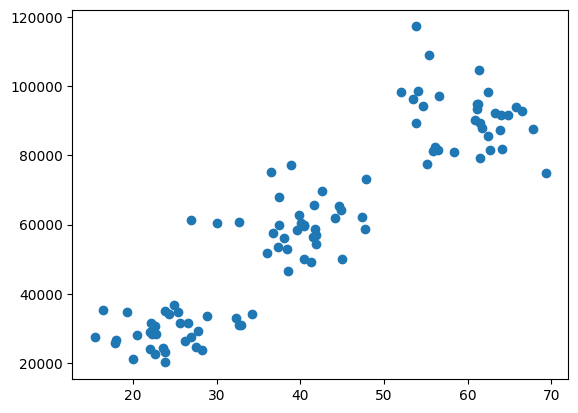

In [10]:
# plot the data on a scatter plot
plt.scatter(df["age"], df["income"])
plt.show

In [13]:
km = KMeans(n_clusters=3)


KMeans(n_clusters=3)

In [14]:
y_pred = km.fit_predict(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [15]:
y_pred

array([0, 0, 0, 2, 1, 2, 2, 2, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 2, 1,
       2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 0, 1, 2, 0, 1, 1, 0, 2, 1, 0, 2, 1,
       2, 1, 0, 1, 1, 0, 1, 1, 2, 1, 0, 0, 1, 0, 1, 2, 0, 0, 0, 1, 0, 0,
       1, 1, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 0, 1, 0,
       2, 2, 2, 1, 2, 2, 0, 2, 1, 0, 2], dtype=int32)

In [16]:
# append the predicted to the data frame
df["cluster"] = y_pred

In [17]:
df

,age,income,cluster
0,37.351199,53634.287816,0
1,41.480601,56475.670421,0
2,39.639949,58357.890066,0
3,26.571237,31620.419847,2
4,64.067586,81841.897150,1
...,...,...,...
94,40.025567,60479.940824,0
95,25.337641,34656.400596,2
96,61.732241,87765.372147,1
97,30.062155,60421.611470,0


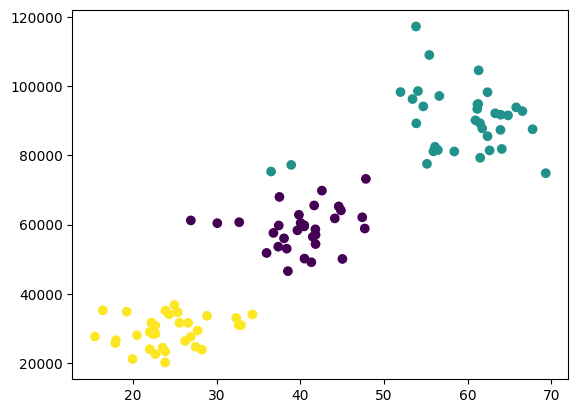

In [18]:
# let make scater plot
plt.scatter(df["age"], df["income"], c=df["cluster"])
plt.show()

In [24]:
# lers improve the features by scaling the data
scaler = MinMaxScaler()

scaler.fit(df.drop("cluster", axis=1))

MinMaxScaler()

In [25]:
scaler.transform(df.drop("cluster", axis=1))

array([[0.40667017, 0.34466623],
       [0.48328918, 0.37395882],
       [0.4491368 , 0.39336313],
       [0.20665333, 0.11771923],
       [0.90237945, 0.63546619],
       [0.23758751, 0.03808382],
       [0.13450739, 0.08549308],
       [0.22783448, 0.09505263],
       [0.54074151, 0.46455528],
       [0.97069872, 0.69427258],
       [0.84403636, 0.72091071],
       [0.71271703, 0.71162168],
       [0.60097328, 0.54640854],
       [0.87532924, 0.63120359],
       [0.76381981, 0.79317858],
       [0.71215238, 1.        ],
       [0.48934494, 0.35239582],
       [0.71638719, 0.80785881],
       [0.48631642, 0.46737685],
       [0.67777715, 0.8048469 ],
       [0.22358124, 0.04649272],
       [0.88781754, 0.74164182],
       [0.1342929 , 0.02480144],
       [0.85409648, 0.71206218],
       [0.94817433, 0.74809512],
       [0.31347174, 0.13254357],
       [0.12177706, 0.09144383],
       [0.84800944, 0.7547406 ],
       [0.12167798, 0.03935377],
       [0.89992723, 0.73742401],
       [0.

In [26]:
# make the prediction
y_pred = km.fit_predict(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [27]:
# combine the predicted in the cluster
df["cluster"] = y_pred



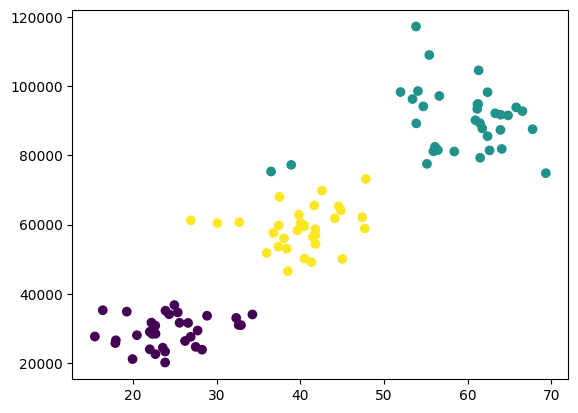

In [28]:
# plot the data
plt.scatter(df["age"], df["income"], c=df["cluster"])
plt.show()

In [29]:
km.cluster_centers_

array([[2.43322223e+01, 2.91408246e+04, 3.33066907e-16],
       [5.88084044e+01, 8.99687846e+04, 1.00000000e+00],
       [4.01370242e+01, 5.89191146e+04, 2.00000000e+00]])

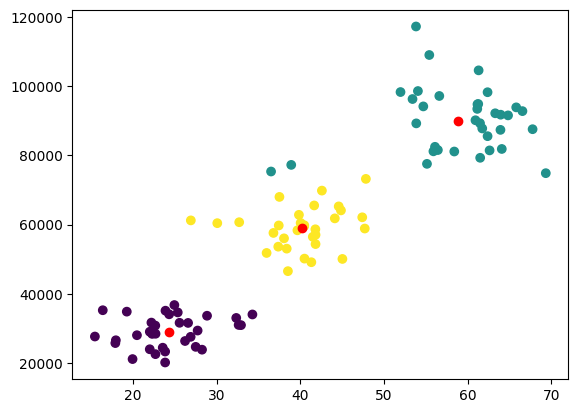

In [30]:
# plot the cluster centers
plt.scatter(df["age"], df["income"], c=df["cluster"])
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], c="red")
plt.show()

In [31]:
# get the sum of the square error
km.inertia_


4835464040.702799